## The Uniform Distribution

Load libraries. We use the scipy.stats library.

In [16]:
import scipy.stats as stats

Use scipy library to create a randam uniform distribution data (100000 numbers from 0 to 10)

In [45]:
data = stats.uniform.rvs(loc=0,scale=10, size=100000)

Plot the following density distribution.
You can use figsize=(9,9), xlim=(-1,11)

[(-1.0, 11.0)]

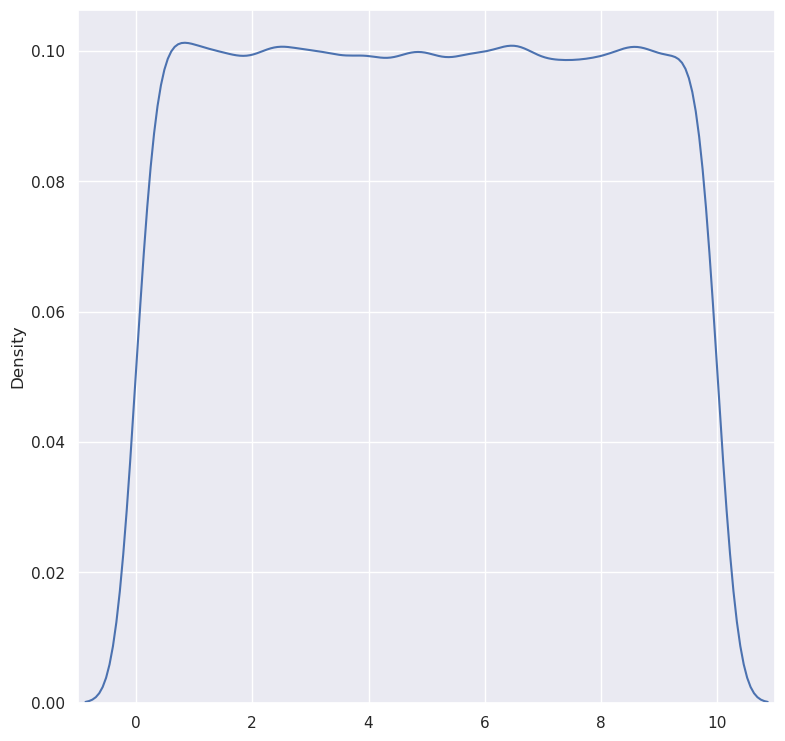

In [46]:
import seaborn as sns

sns.set(rc={'figure.figsize':(9,9)})
plot = sns.kdeplot(data)

plot.set(xlim=(-1,11))



Check scipy libraries and use useful functions. 

cdf (cumulative distribution function) gives you the area under the distribution's density curve to the left of a certain value on the x axis. Calculate cdf with x axis from 0 to 2.5. 

In [58]:
stats.uniform.cdf(x=2.5, loc=0, scale=10)

0.25

ppf() is the inverse of cdf(): it returns the x axis cutoff value (quantile) associated with a given probability. Caculate the cutoff value for propabality with 40%.

In [59]:
stats.uniform.ppf(q=0.4,loc=0,scale=10)

4.0

Demonstrate for uniform distribution, x values within the range will have the same probability desity.  x values outside the range have a probability density of 0. The output is similar as the following.

In [62]:
val = -1
for i in range(5):
    print('Density at X value ' + str(val))
    print(stats.uniform.pdf(val, loc=0, scale=10))
    val += 3

Density at X value -1
0.0
Density at X value 2
0.1
Density at X value 5
0.1
Density at X value 8
0.1
Density at X value 11
0.0


Probability distribution functions in scipy also support median(), mean(), var() and std().

## The Normal Distribution


Use scipy's norm to have normal distribution (see the graph below) .  The normal distribution has default vaues of  mean of 0 and standard deviation of 1. Investigate what percentage of data generated by a default normal distribution is below -1. What percentage of data generated is above 1 and what percentage lies between -1 and 1. Print the three percentages. The output is similar as the following. 

In [43]:
from scipy.stats import norm

size=1000
distribution = norm().rvs(size=size)

below=0
between=0
above=0

for num in distribution:
    if num < -1:
        below += 1
        continue
    elif num > -1 and num < 1:
        between += 1
    elif num > 1:
        above += 1
        
print('Percentage of numbers below -1 ' + str(below/size))
print('Percentage of numbers above 1 ' + str(above/size))
print('Percentage of numbers between ' + str(between/size))

Percentage of numbers below -1 0.154
Percentage of numbers above 1 0.158
Percentage of numbers between 0.688


Plotting is not required. The codes will be included in the solution. The image below shows the bell shape normal distribution.  

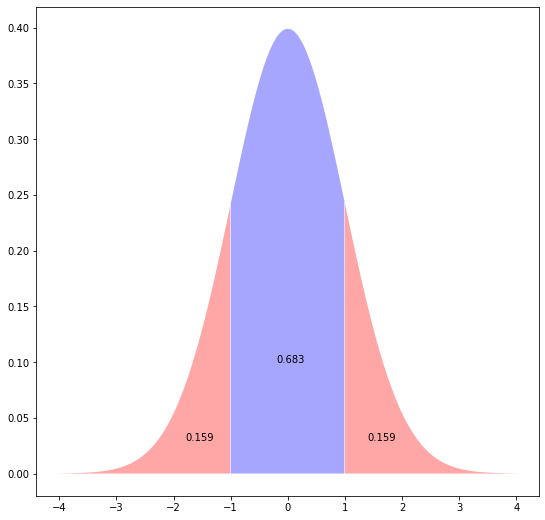


print the ppf for 2.5% cutoff and 97.5% cutoff. The output is similar as the following

In [44]:
# original output
print(norm.ppf(q=0.025))
print(norm.ppf(q=0.975))

-1.9599639845400545
1.959963984540054


The quantile output above confirms that roughly 5% of the data lies more than 2 standard deviations from the mean.


## The Binomial Distribution

We will use binomial distribution to model coin flips. The scipy name for the binomial is binom. Here we set the number of flips per trial to 10,  the number of trials to 10000, and success probability to 0.5. 

Create a random binomial distribution data "fair_coin_flips" in the code line below.

In [50]:
from scipy.stats import binom
import pandas as pd

fair_coin_flips = binom.rvs(n=10, p=0.5, size=10000)

col_0   0    1    2     3     4     5     6     7    8    9   10
row_0                                                           
counts  13  115  456  1195  2024  2408  2059  1175  441  107   7


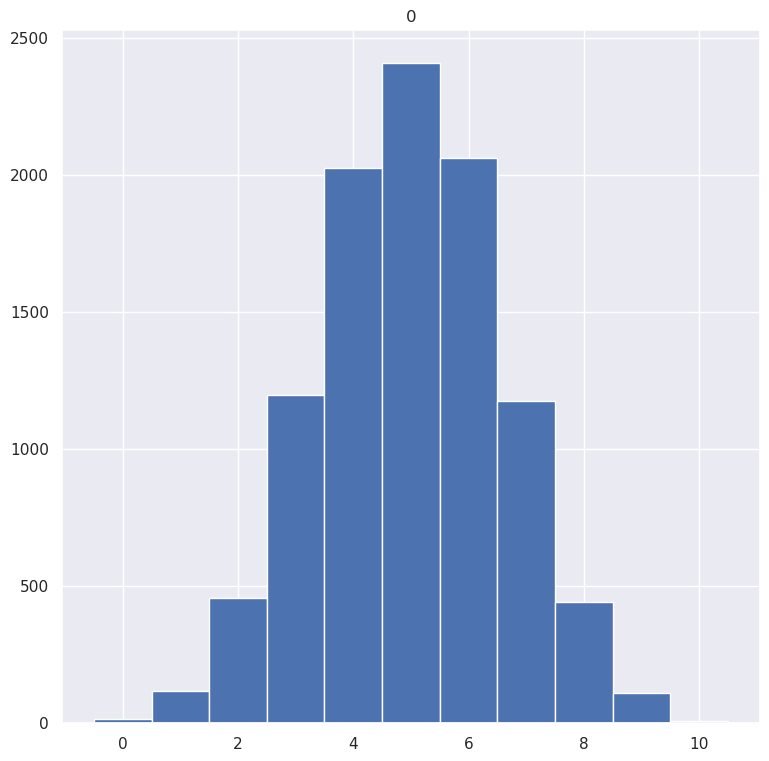

In [51]:
# Codes are provided here. 
# Print out the counts for 0 heads, 1 head, ...10 heads of each trial with 10000 trials. 
print( pd.crosstab(index="counts", columns= fair_coin_flips))
# Draw the histogram.
pd.DataFrame(fair_coin_flips).hist(range=(-0.5,10.5), bins=11);

The histogram above shows us that a binomial distribution with a 50% probability of success is roughly symmetric, with the most likely outcomes lying at the center. 
Change the success rate to 0.8, implement the codes similar as above to show the distribution won't be symmetric:

col_0   2   3   4    5    6     7     8     9     10
row_0                                               
counts   1   6  70  276  888  2006  3015  2722  1016


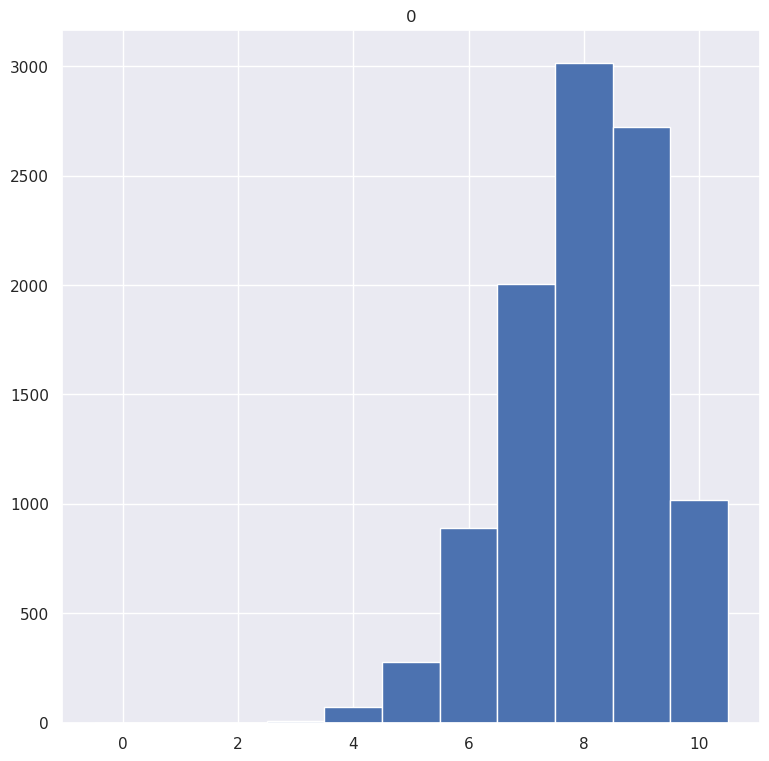

In [52]:
coin_flips = binom.rvs(n=10, p=0.8, size=10000)
print( pd.crosstab(index="counts", columns= coin_flips))
# Draw the histogram.
pd.DataFrame(coin_flips).hist(range=(-0.5,10.5), bins=11);

Continue from above binomial distribution(success rate=0.8), give the codes to get the probability of achieving 5 heads or less with 10 flips.

In [53]:
binom.cdf(k=5,n=10,p=0.8)

0.03279349759999997

Continue from above binomial distribution(success rate=0.8), give the codes to get the probability of achieving 9 heads or more with 10 flips.

In [55]:
1 - binom.cdf(k=8,n=10,p=0.8)

0.37580963840000015

For continuous probability density functions, you use pdf() to check the probability density at a given x value. For discrete distributions like the binomial, use stats.distribution.pmf() (probability mass function) to check the mass (proportion of observations) at given number of successes k. 
Write codes to give the probability density at 5 heads with success rate of 0.5 of 10 flips.

In [56]:
binom.pmf(k=5,n=10,p=0.5)

0.24609375000000003

What about the probability density at 8 heads with success rate of 0.8 of 10 flips?

In [57]:
binom.pmf(k=8,n=10,p=0.8)

0.30198988799999993

## Wrap Up

Extra information of Exponential Distributions and Poisson Distributions will be given in the solution. 


Python's scipy library contains functions that make it easy to work with a wide range of probability distributions, including [many that we did not discuss](https://docs.scipy.org/doc/scipy/reference/stats.html) in this lesson. Probability distribution functions are useful for generating random data, modeling random events and aiding with statistical tests and analysis.
